# Comparing LZ compression algorithms

## Introduction

In this notebook, we"ll compare different versions of the LZ compression algorithm—specifically, LZW, LZMA, LZ77, and LZ78—on a set of sample files.

## Prerequisites

The following libraries are used:

- `lzma` (built-in module)
- `zlib` (built-in module)
- `pandas`
- `matplotlib`
- `seaborn`

In [1]:
import os
from pathlib import Path
import time
import lzma
import zlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
sample_dir = Path("samples")
files = [f for f in sample_dir.iterdir() if f.is_file()]

def read_file_content(file_path: Path) -> bytes:
    return file_path.read_bytes()

In [3]:
# LZMA compression

def compress_lzma(data: bytes) -> bytes:
    return lzma.compress(data)

def decompress_lzma(data: bytes) -> bytes:
    return lzma.decompress(data)

In [4]:
# LZ77 compression

def compress_lz77(data: bytes) -> bytes:
    return zlib.compress(data)

def decompress_lz77(data: bytes) -> bytes:
    return zlib.decompress(data)

In [5]:
results = []

for file_path in files:
    data = read_file_content(file_path)
    original_size = len(data)
    file_name = file_path.name

    algorithms = [
        ("LZMA", compress_lzma, decompress_lzma),
        ("LZ77", compress_lz77, decompress_lz77),
    ]

    for algorithm_name, compress_func, decompress_func in algorithms:
        start_time = time.perf_counter()
        compressed_data = compress_func(data)
        compression_time = time.perf_counter() - start_time

        compressed_size = len(compressed_data)
        compression_ratio = original_size / compressed_size
        
        start_time = time.perf_counter()
        decompressed_data = decompress_func(compressed_data)
        decompression_time = time.perf_counter() - start_time

        results.append({
            "file": file_name,
            "algorithm": algorithm_name,
            "original size (bytes)": original_size,
            "compressed size (bytes)": compressed_size,
            "compression ratio": compression_ratio,
            "compression time (seconds)": compression_time,
            "decompression time (seconds)": decompression_time,
        })

In [6]:
df = pd.DataFrame(results)
df

,file,algorithm,original size (bytes),compressed size (bytes),compression ratio,compression time (seconds),decompression time (seconds)
0,a.txt,LZMA,1,60,0.016667,0.003642,0.000074
1,a.txt,LZ77,1,9,0.111111,0.000045,0.000006
2,aaa.txt,LZMA,100000,148,675.675676,0.006582,0.000427
3,aaa.txt,LZ77,100000,121,826.446281,0.000524,0.000255
4,alphabet.txt,LZMA,100000,176,568.181818,0.005028,0.000389
5,alphabet.txt,LZ77,100000,290,344.827586,0.000644,0.000110
6,encrypted_random.txt,LZMA,100032,100096,0.999361,0.023777,0.000191
7,encrypted_random.txt,LZ77,100032,100073,0.999590,0.002367,0.000031
8,random.txt,LZMA,100000,76264,1.311235,0.018327,0.003864
9,random.txt,LZ77,100000,75200,1.329787,0.003302,0.000317


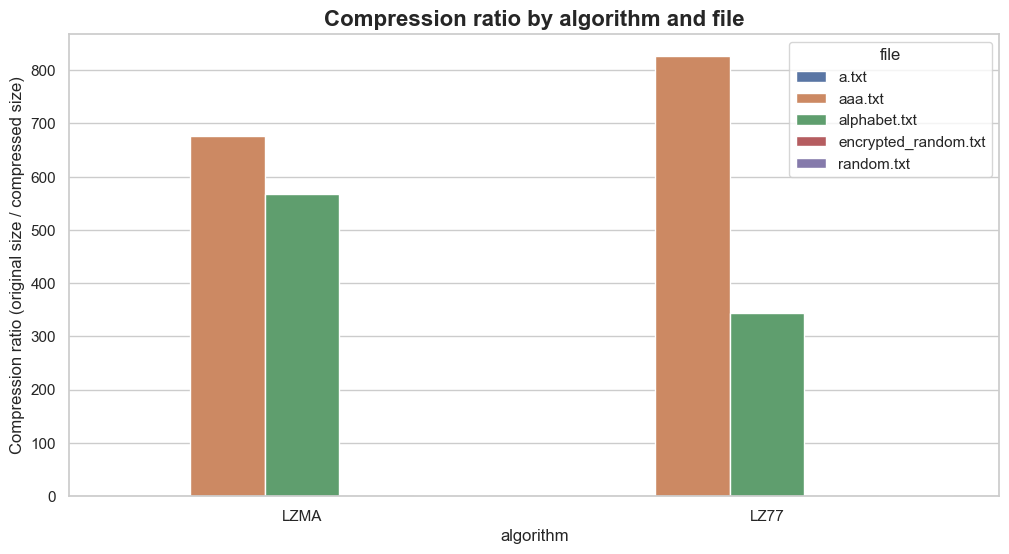

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="algorithm", y="compression ratio", hue="file")
plt.title("Compression ratio by algorithm and file", fontsize=16, weight="bold")
plt.ylabel("Compression ratio (original size / compressed size)")
plt.show()

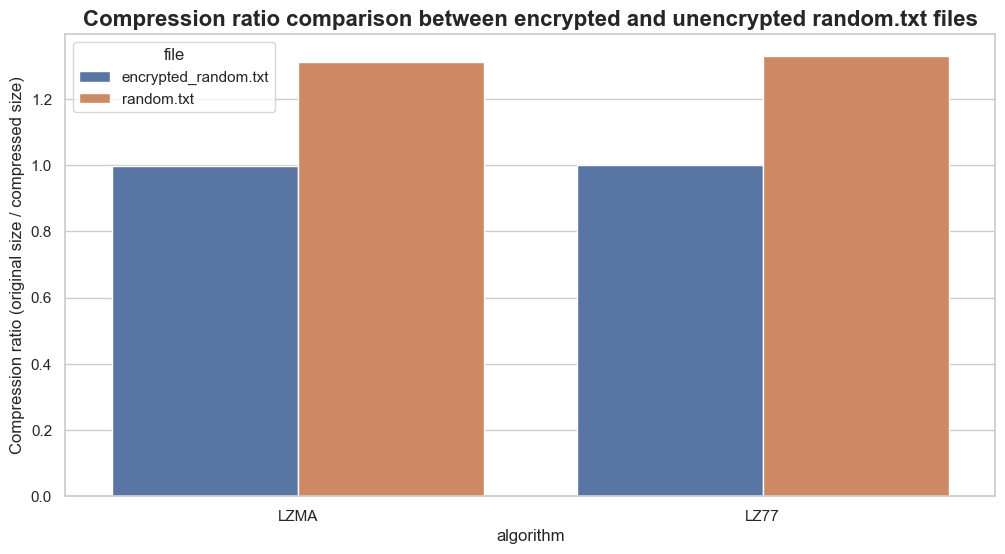

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df["file"].isin(["random.txt", "encrypted_random.txt"])], x="algorithm", y="compression ratio", hue="file")
plt.title("Compression ratio comparison between encrypted and unencrypted random.txt files", fontsize=16, weight="bold")
plt.ylabel("Compression ratio (original size / compressed size)")
plt.show()

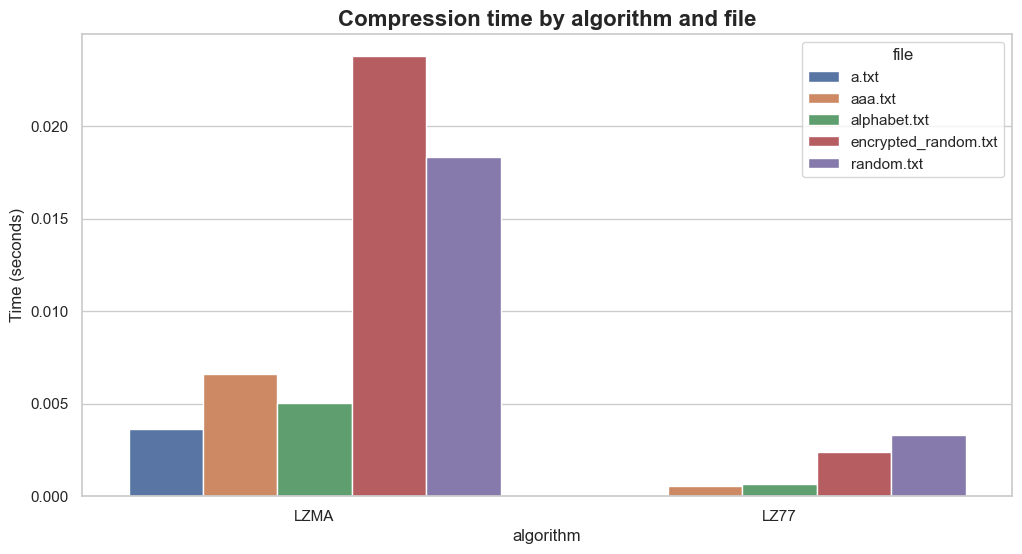

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="algorithm", y="compression time (seconds)", hue="file")
plt.title("Compression time by algorithm and file", fontsize=16, weight="bold")
plt.ylabel("Time (seconds)")
plt.show()

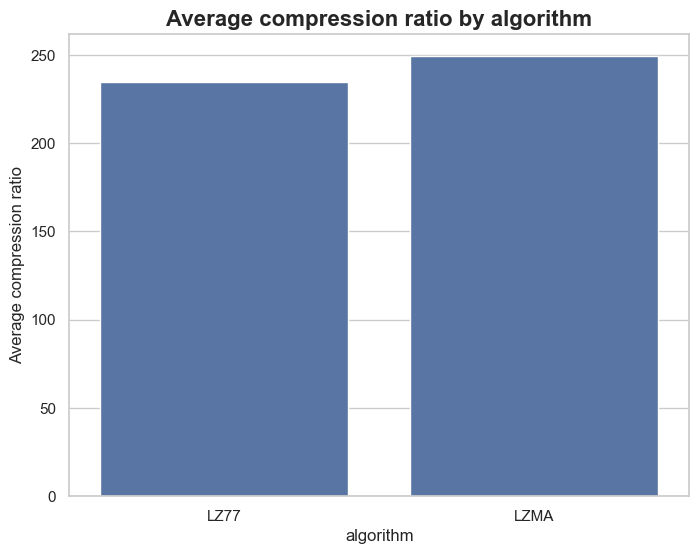

In [10]:
avg_ratio = df.groupby("algorithm")["compression ratio"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_ratio, x="algorithm", y="compression ratio")
plt.title("Average compression ratio by algorithm" , fontsize=16, weight="bold")
plt.ylabel("Average compression ratio")
plt.show()

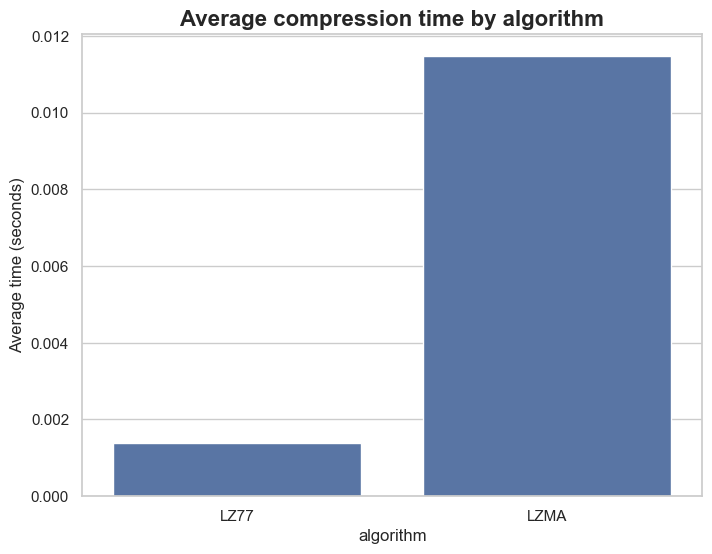

In [11]:
avg_time = df.groupby("algorithm")["compression time (seconds)"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_time, x="algorithm", y="compression time (seconds)")
plt.title("Average compression time by algorithm", fontsize=16, weight="bold")
plt.ylabel("Average time (seconds)")
plt.show()

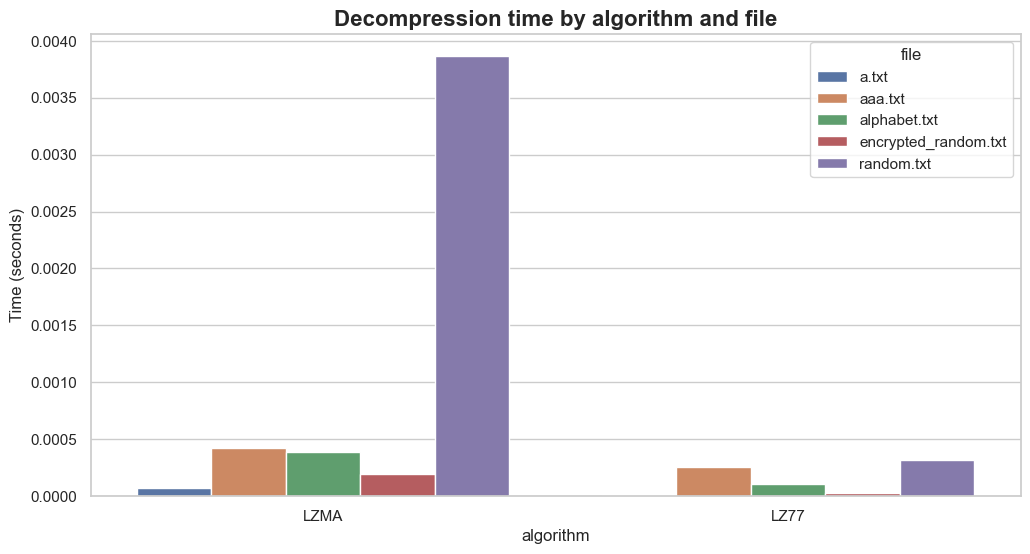

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="algorithm", y="decompression time (seconds)", hue="file")
plt.title("Decompression time by algorithm and file", fontsize=16, weight="bold")
plt.ylabel("Time (seconds)")
plt.show()

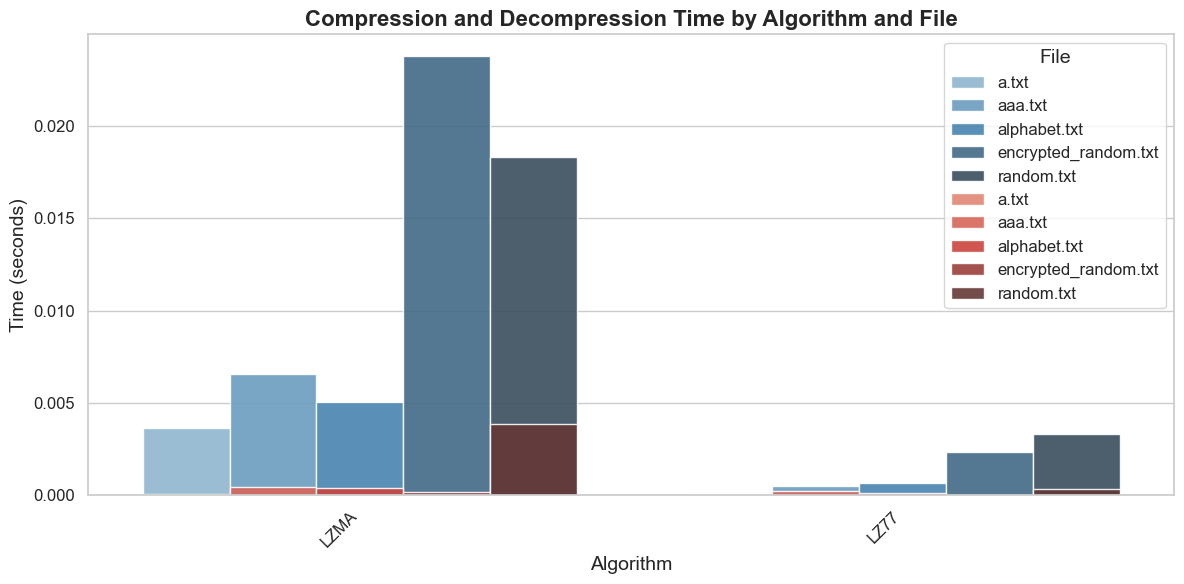

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="algorithm", y="compression time (seconds)", hue="file", palette="Blues_d", alpha=0.9)
sns.barplot(data=df, x="algorithm", y="decompression time (seconds)", hue="file", palette="Reds_d", alpha=0.9)
plt.title("Compression and Decompression Time by Algorithm and File", fontsize=16, weight="bold")
plt.ylabel("Time (seconds)", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.legend(title="File", fontsize=12, title_fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()